In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = 'Dynamic_2017_2_0.csv'
data = pd.read_csv(file_path)

# Drop columns with a lot of missing values or irrelevant information
data = data.drop(columns=['S.no.', 'Name of State', 'Name of District'])

# Fill missing values with the mean of the column
data = data.fillna(data.mean())

# Features and target variable
X = data.drop(columns=['Net Ground Water Availability for future use'])
y = data['Net Ground Water Availability for future use']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test set: {mae}')

# Predicting
y_pred = model.predict(X_test)

# Calculate accuracy (R^2 Score)
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
print(f'R^2 Score on test set: {accuracy}')


Epoch 1/100
44/44 [==============================] - 1s 8ms/step - loss: 1423171712.0000 - mean_absolute_error: 24673.1504 - val_loss: 1216369920.0000 - val_mean_absolute_error: 22074.0605
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 1367227264.0000 - mean_absolute_error: 24074.8223 - val_loss: 1093808128.0000 - val_mean_absolute_error: 20837.6973
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 1126839808.0000 - mean_absolute_error: 21836.3691 - val_loss: 731365952.0000 - val_mean_absolute_error: 17060.8418
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 664030336.0000 - mean_absolute_error: 17064.7676 - val_loss: 338789856.0000 - val_mean_absolute_error: 12378.2910
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 312224928.0000 - mean_absolute_error: 12282.1152 - val_loss: 209107264.0000 - val_mean_absolute_error: 9533.7881
Epoch 6/100
44/44 [==============================] - 0s 4ms/s

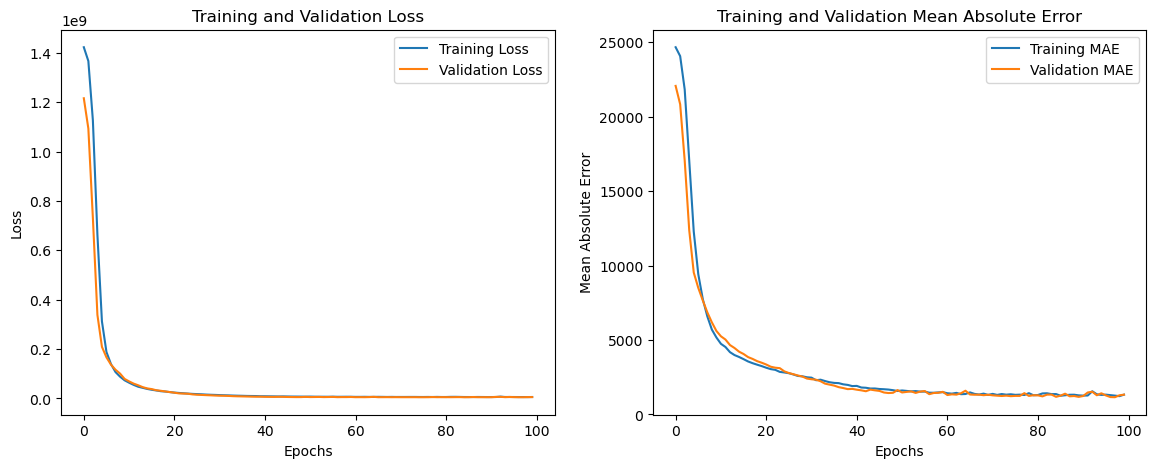

Mean Squared Error: 3186671.9826852335
Mean Absolute Error: 1067.3370361328125


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation mean absolute error (as a measure of accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

# Display additional metrics
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')